In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

metric = 'auc_relaxed'

dataset = 'drums'
base_path = f'/home/ec2-user/evaluations/{dataset}'

if metric == 'auc':
    value = 'roc_auc'
    intersection = '0.05'
if metric == 'leo_metric':
    value = 'leo_metric'
    intersection = '0'
if metric == 'auc_relaxed':
    value = 'roc_auc'
    intersection = '0.09'

In [3]:
files_auc_complete = [
    f'{base_path}/{metric}_SHAP_{{}}_samples{{}}_{intersection}.tsv',
    f'{base_path}/{metric}_LR_{{}}_samples{{}}_{intersection}.tsv',
    f'{base_path}/{metric}_RF_{{}}_samples{{}}_{intersection}.tsv',
]

names = ["zeros",'noise_0.1', 'noise_0.5', 'noise_1']
samples = [100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 6000, 8000, 10000, 12000, 14000, 18000]
methods = ['SHAP', 'LR', 'RF']

df_combinations = []
for method, file_template in zip(methods, files_auc_complete):
    for name, n_sample in itertools.product(names, samples):
        file_path = file_template.format(name, n_sample)
        try:
            df_combination = pd.read_csv(file_path, sep='\t')
            df_combination['method'] = method
            df_combination['name'] = name
            df_combination['n_sample'] = n_sample
            df_combinations.append(df_combination)
        except FileNotFoundError:
            print(f"File not found: {file_path}")
            
final_df_combination = pd.concat(df_combinations, ignore_index=True)


In [5]:
final_df_combination

,filename,event_label,actual_score,real_order,model_order,roc_auc,true_markers,method,name,n_sample
0,5057.wav,5.0,16.348190,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...,[ 4.87952735 -0.14607299 3.11522624 6.708365...,0.607843,"[[0.0, 0.255], [0.255, 0.409], [0.578, 1.448],...",SHAP,zeros,100
1,1049.wav,1.0,16.606397,[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 15.72699404 -5.46557649 -6.21886549 17.93...,0.822034,"[[0.532, 0.808]]",SHAP,zeros,100
2,5059.wav,5.0,19.519925,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 6.88090954 -1.94704102 -19.67770864 -15.42...,0.580902,"[[2.647, 2.763], [2.763, 3.087], [3.087, 3.576...",SHAP,zeros,100
3,3033.wav,3.0,14.182717,[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. ...,[ -1.12286854 27.83401944 7.37535387 -30.27...,0.526316,"[[0.0, 0.568], [1.474, 2.275], [6.12, 6.895]]",SHAP,zeros,100
4,5079.wav,5.0,16.754882,[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. ...,[-7.93661666 2.86202652 -4.67872342 13.266657...,0.570833,"[[0.0, 0.511], [0.511, 0.799], [1.619, 2.206],...",SHAP,zeros,100
...,...,...,...,...,...,...,...,...,...,...
9595,3082.wav,3.0,15.810801,[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. ...,[0.03305515 0.023795 0.01253671 0.01009138 0...,0.438235,"[[0.0, 0.876], [3.176, 3.291], [3.291, 3.473]]",RF,noise_1,18000
9596,4073.wav,4.0,-4.577690,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. ...,[0.01402093 0.01621431 0.01221094 0.01483107 0...,0.800000,"[[1.457, 1.875], [3.369, 3.591], [3.737, 3.847...",RF,noise_1,18000
9597,5021.wav,5.0,16.624804,[0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. ...,[0.00664938 0.00412851 0.00501622 0.00347818 0...,0.932870,"[[0.411, 1.123], [1.706, 2.07], [2.07, 2.637],...",RF,noise_1,18000
9598,3048.wav,3.0,14.381111,[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. ...,[0.01094893 0.01085902 0.00935399 0.01434292 0...,0.838889,"[[0.978, 1.423], [4.141, 4.999], [4.999, 5.659]]",RF,noise_1,18000


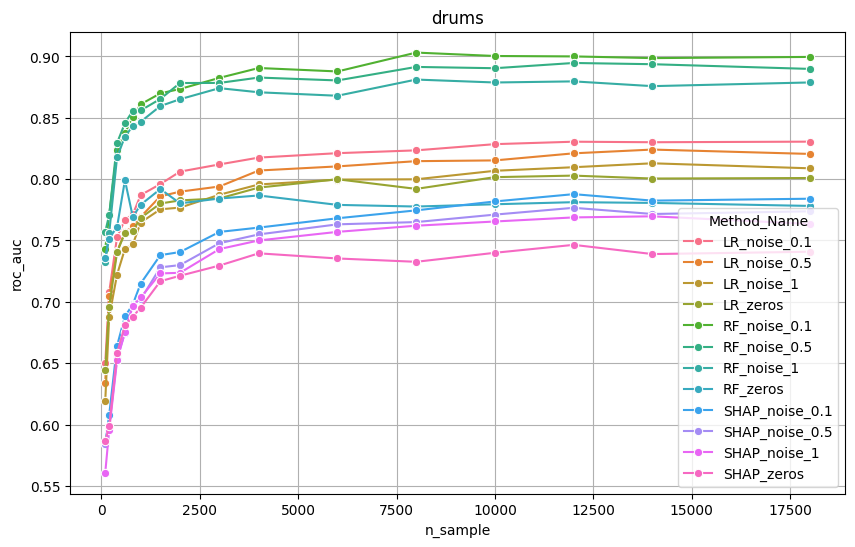

In [7]:
mean_auc_df_combination = final_df_combination.groupby(['method', 'name', 'n_sample'])[value].mean().reset_index()
# mean_auc_df_combination = mean_auc_df_combination[mean_auc_df_combination['method'] == "LR"]
mean_auc_df_combination = pd.DataFrame(mean_auc_df_combination)

# Create a grouping column combining method and name
mean_auc_df_combination["group"] = mean_auc_df_combination["method"] + "_" + mean_auc_df_combination["name"]

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_auc_df_combination, x="n_sample", y="roc_auc", hue="group", marker="o")
plt.title(dataset)
plt.xlabel("n_sample")
plt.ylabel("roc_auc")
plt.legend(title="Method_Name")
plt.grid(True)
plt.show()